In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [3]:
nx, ny, nz = 288, 272, 280
outputFolder = f"left_inlet_right_outlet_cube_obs_{nx}_{ny}_{nz}_output"

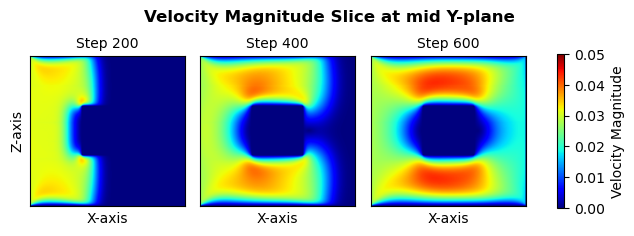

In [6]:
steps = [200, 400, 600]
vmin, vmax = 0, 0.05

fig, axes = plt.subplots(1, len(steps), figsize=(8, 2.5))

for i, step in enumerate(steps):
    vx_frame = np.fromfile(outputFolder + f"/vx_{step}.dat", dtype=np.float32).reshape(nz, ny, nx)
    vy_frame = np.fromfile(outputFolder + f"/vy_{step}.dat", dtype=np.float32).reshape(nz, ny, nx)
    vz_frame = np.fromfile(outputFolder + f"/vz_{step}.dat", dtype=np.float32).reshape(nz, ny, nx)
    v = np.sqrt(vx_frame**2 + vy_frame**2 + vz_frame**2)

    im = axes[i].imshow(v[:, ny // 2, :], cmap="jet", origin="lower", vmin=vmin, vmax=vmax)
    axes[i].set_xlabel("X-axis")
    if i == 0:
        axes[i].set_ylabel("Z-axis")

    axes[i].set_title(f"Step {step}", fontsize=10)
    axes[i].set_xticks([])
    axes[i].set_yticks([])

plt.suptitle("Velocity Magnitude Slice at mid Y-plane", fontweight="bold", fontsize=12)
plt.subplots_adjust(wspace=0.1)

cbar = plt.colorbar(im, ax=axes.ravel().tolist(), location="right", shrink=0.8, pad=0.05)
cbar.set_label("Velocity Magnitude")

plt.savefig("velocity_magnitude_slice.png", dpi=300, bbox_inches="tight")
